# CSG CAD in Python

## Setup
To setup this environment, you need to install:
* [OpenSCAD](https://www.openscad.org/downloads.html)

Then you need to open your anaconda command prompt and power shell. 
* install [SolidPython](https://github.com/SolidCode/SolidPython#using-solidpython) using the command `pip install solidpython`
* install [viewscad](https://github.com/nickc92/ViewSCAD) by running the command `pip install viewscad

Alternatively you can run the lines bellow`

In [1]:
from solid import *
from solid.utils import *
import viewscad

r = viewscad.Renderer(openscad_exec='C:\Program Files\OpenSCAD\openscad.exe')

Above we setup the environment. It includes importing the relivant functions and telling the rendered where openscad is. You may need to change the line `openscad_exec='C:\Program Files\OpenSCAD\openscad.exe'`

**Next lets generate a simple cylinder**

In [4]:
c = cylinder(r=10,h=5)
r.render(c)
print(scad_render(c))



cylinder(h = 5, r = 10);


In [3]:
print(c)

The code is converting the cylinder to a very basic form of an equation into a triangulated surfce. But as we can see the resolution isnt great. This is the same problem we have when we convert from a nice geoemtry in Solidworks/Autodesk to STL files. 

How can we fix it? We increase the discritization resolution

In [ ]:
c = cylinder(r=10,h=5,segments=1000)
r.render(c)

Ok, so openSCAD aaaaaaaaaaalways converts from CSG into a mesh to be viewed. We can see this when we zoom into the objet and all of the sudden there isnt anything inside! And we can set the resolution of this conversion. 

## What are the primitives?
### sphere

In [5]:
# Sphere with radius 10
s1 = sphere(r=10)
r.render(s1)

In [ ]:
# Set diameter to 5
s2 = sphere(d=5, segments = 100)
r.render(s2)

### Cuboids

In [6]:
c1 = cube(10)
r.render(c1)

The basic function puts a corner at the origin with the side length you set. 
We can also tell it to automatically put it with the center at the origin

In [ ]:
c2 = cube(10,True)
r.render(c2)

We can also use it to make a rectangular prisim.

In [10]:
c3 = cube([10,20,30])
r.render(c3)

You can note that there is no segments argument to cube because a triangulated mesh is a perfect representation of a cube. 

### Cylinder
we saw the basics above, but we can also make Cones using cylinder

In [11]:
c2 = cylinder(r1 = 10, r2=5,h=5)
r.render(c2)

It is also possible to define cone sections using diameters and to shift the center to the center of the height axis. The height axis will be in the Z direction

In [12]:
c3 = cylinder(d1 = 10, d2=5,h=5,center=True)
r.render(c3)

### Polyhedron

What if those primitives are not what you need? What if I need to make a pyramids?  or Tetra hedra, or any of the platonic solids besides a cube? 

In [ ]:
points = [[0,0,0],[0,1,0],[1,1,0],[1,0,0],[0.5,0.5,1]]
faces = [[0,1,2,3], # Base
         [0,1,4],[1,2,4],[2,3,4],[3,0,4]]
p = polyhedron(points = points,faces = faces)
r.render(p)

In [7]:
points=[ [10,10,0],[10,-10,0],[-10,-10,0],[-10,10,0], # the four points at base
           [0,0,10]  ]                               # the apex point 
faces=[ [0,1,4],[1,2,4],[2,3,4],[3,0,4],              # each triangle side
              [1,0,3],[2,1,3] ]                       # two triangles for square base
p2 = polyhedron(points = points,faces = faces)
r.render(p2)

In [8]:
def pyramid(side,height):
    s = side/2.0
    points=[ [s,s,0],[s,-s,0],[-s,-s,0],[-s,s,0], # the four points at base
           [0,0,height]  ]                               # the apex point 
    faces=[ [0,1,4],[1,2,4],[2,3,4],[3,0,4],              # each triangle side
              [1,0,3],[2,1,3] ]                       # two triangles for square base
    return polyhedron(points = points,faces = faces)
r.render(pyramid(10,10))

If your polygon is having issues with faces not showing up. look at the segment on debugging your faces [here](https://en.wikibooks.org/wiki/OpenSCAD_User_Manual/Primitive_Solids#polyhedron)

### Well what about those basic CSG operations?
* Union
* Difference
* Intersection

Arent they just the opperations of a **SET??**

In [13]:
c3 = c1 + c2
r.render(c3)

In [14]:
c3 = c1 - c2 
r.render(c3)

In [ ]:
c3 = c2 - c1 
r.render(c3)

In [15]:
c3 = c1*c2 
r.render(c3)

### Hole

In [16]:
pipe_od = 10
pipe_id = 3
seg_length = 10
outer = cylinder(r=pipe_od, h=seg_length)
inner = cylinder(r=pipe_id, h=seg_length)
pipe_a = outer - hole()(inner)
r.render(pipe_a)

In [17]:
pipe_a = outer + hole()(inner)
r.render(pipe_a)

## Transformations

* Scale 
    * scale a 
    * scale [a1,a2,a3]
    * resize [x,y,z]
* Rotate
    * axis angle
    * [dx,dy,dz] euler
* Translate
    * tx ty tz
* mirror
    * plane normal n1 n2 n3
* Homogenous SE(3)
    


### Scaling

In [18]:
x = scale(1.5)(cube(10))-cube(10)
r.render(x)

In [19]:
x = scale([1,2,3])(sphere(10))
r.render(x)

In [20]:
x = resize([20,5,10])(sphere(10))
r.render(x)

## Rotation SO(3)

As we discussed in class there are several ways to do rotations. namely Axis-angle, Euler Angles, and Quaternions. Natively OpenSCAD only does the first two. Lets look at Axis-angle

In [ ]:
angle = 45
axis = [0,1,0]
x = rotate(angle,axis)(pyramid(10,10))
r.render(x)

In [ ]:
angle = 45
axis = [1,1,0]
x = rotate(angle,axis)(pyramid(10,10))
r.render(x)

In [ ]:
angles = [20,10,5]
x = rotate(angles)(pyramid(10,10))
r.render(x)

In [ ]:
angles = [20,10,5]
x2 = rotate(angles[0],[1,0,0])(pyramid(10,10))
r.render(x2)

In [ ]:
x2 = rotate(angles[1],[0,1,0])(x2)
r.render(x2)

In [ ]:
x2 = rotate(angles[2],[0,0,1])(x2)
r.render(x2)

In [ ]:
r.render(x-x2+sphere(1))

This means the system uses the XYZ euler angles. NOT any of the implicit XY'Z'' or the standard ZXZ system. So be aware when someone quotes you euler angles!

We can also use quaterions, but we need to insert our own transformation. To do that we can convert to Matrix form using the equation below

$$ R= \left(\begin{matrix}1-2(q_j^2-q_k^2)&2(q_iq_j-q_kq_r)&2(q_iq_k+q_jq_r)\\2(q_iq_j+q_kq_r)&1-2(q_i^2-q_k^2)&2(q_jq_k-q_iq_r)\\2(q_iq_k-q_jq_r)&2(q_jq_k+q_iq_r)&1-2(q_i^2-q_j^2)\end{matrix}\right) $$


We should note that the naming here is carefully chosen. some people list quaternions as $$q = [q_r,q_i,q_j,q_k]$$ others use $$q = [q_i,q_j,q_k,q_r]$$ so be careful when storing quaternion as a list or connecting two bits of quaternion code from different sources together. Scipy and numpy use the second convention


In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as RM
rm = RM.from_quat([np.sin(np.pi/4),0, 0, np.cos(np.pi/4)])
rot = rm.as_dcm()
print(rot)
y = multmatrix(rot)(pyramid(10,10))
r.render(y)

## Translate T(3)

In [ ]:
y = translate([0,10,0])(pyramid(10,10))+pyramid(10,10)
r.render(y)

### Mirror

In [22]:
c = cube([30,20,10])
c1 = translate([20,0,0])(rotate(45,[0,0,1])(c))
c2 = mirror([1,1,0])(c1)
r.render(c1+c2)


## SE(3)

In [27]:
import numpy as np
def Nx(n):
    x = n[0]
    y = n[1]
    z = n[2]
    nx = np.array( [ [0, -z,  y],
                     [z,  0,  x],
                     [-y,  x, 0] ] )
    return nx

def AxisAngle(n,theta):
    mag = np.linalg.norm(n)
    v = n/mag
    s = np.sin(theta)
    c = np.cos(theta)
    NM = Nx(v)
    r = np.eye(3)+s*NM+(1-c)*NM@NM
    return r

def AxisAngleDistance(n,theta,D):
    R = AxisAngle(n,theta)
    d = np.array(D).T.reshape((1,3)) 
    return np.block([
                    [R , d.T],
                    [0,0,0, 1]  
                    ])

In [28]:
n = [0,0,1]
theta = np.pi/4
D = [3,1,0]
RD = AxisAngleDistance(n,theta,D)

y = multmatrix(RD)(pyramid(10,10))
r.render(y)

### Other Operations
* [minkowski sum](https://en.wikibooks.org/wiki/OpenSCAD_User_Manual/Transformations)
* [Convex Hull](https://en.wikibooks.org/wiki/OpenSCAD_User_Manual/Transformations)
* Shear transforms using m Matrix
* [Affine Transforms](https://www.wikiwand.com/en/Affine_transformation)

In [29]:
x = cube([10,10,1])+cylinder(1,True)
r.render(x)

In [30]:
x = minkowski()(cube([10,10,1]),cylinder(1,True))
r.render(x)

In [32]:
q = sphere(1)
x = minkowski()(pyramid(10,10),translate([5,5,0])(q))
r.render(x)

In [31]:
q = sphere(1)
x = pyramid(10,10)+translate([5,5,0])(q)
r.render(x)

## Convex Hull

In [33]:
c1 = cylinder(1,1)
c2 = translate([10,10,0])(c1)
y = c1+c2
r.render(y)

In [34]:
c1 = cylinder(1,1)
c2 = translate([10,10,0])(c1)
y = hull()(c1,c2)
r.render(y)

In [35]:
c1 = cylinder(1,1)
c2 = translate([10,10,0])(c1)
c3 = translate([0,10,0])(c1)
y = hull()(c1,c2,c3)
r.render(y)

In [36]:
c1 = cylinder(1,1)
c2 = translate([10,10,0])(c1)
c3 = translate([0,10,0])(c1)
y = c1+c2+c3
r.render(y)

In [37]:
c1 = cylinder(1,1)
c2 = translate([10,10,0])(c1)
c3 = translate([0,10,0])(c1)
c4 = translate([4,7,0])(c1)
y = c1+c2+c3+c4
r.render(y)

In [38]:
c1 = cylinder(1,1)
c2 = translate([10,10,0])(c1)
c3 = translate([0,10,0])(c1)
c4 = translate([4,7,0])(c1)
y = hull()(c1, c2, c3, c4)
r.render(y)

## 2D operations
* square
* circle
* polygon
* text

In [39]:
s1 = square(size = [4,10],center = True)
s2 = square(size = 1.5, center = False)
y = s1-s2
print(scad_render(y))



difference() {
	square(center = true, size = [4, 10]);
	square(center = false, size = 1.5000000000);
}


In [40]:
r.render(y)

CalledProcessError: Command '['C:\\Program Files\\OpenSCAD\\openscad.exe', '-o', 'C:\\Users\\jil26\\AppData\\Local\\Temp\\tmpzh0n21ss\\tmp.stl', 'C:\\Users\\jil26\\AppData\\Local\\Temp\\tmpzh0n21ss\\tmp.scad']' returned non-zero exit status 1.

In [41]:
c1 = circle(r=10)
c2 = circle(d=30)
y = c2-c1
print(scad_render(y))



difference() {
	circle(d = 30);
	circle(r = 10);
}


In [43]:
r_c = 30
n = 6
xs = [r_c*np.cos(2*np.pi/n*i)for i in range(0,n+1)]
ys = [r_c*np.sin(2*np.pi/n*i)for i in range(0,n+1)]
pts = list(zip(xs,ys))
y = polygon(points=pts)
print(scad_render(y))



polygon(paths = [[0, 1, 2, 3, 4, 5, 6]], points = [[30.0, 0.0], [15.000000000000004, 25.980762113533157], [-14.999999999999993, 25.98076211353316], [-30.0, 3.67394039744206e-15], [-15.000000000000014, -25.980762113533153], [14.99999999999998, -25.98076211353317], [30.0, -7.34788079488412e-15]]);


In [44]:
y= text('ME480')
print(scad_render(y))



text(text = "ME480");


## 2D to 3D
* linear extrude
    * text to use to make labels
    * twisting
* rotation extrude
    * [solids of rotations ](https://en.wikibooks.org/wiki/OpenSCAD_User_Manual/2D_to_3D_Extrusion#Linear_Extrude)
   

In [45]:
y = linear_extrude(height =10,center=True)(text('ME480'))
r.render(y)

In [46]:
c1 = circle(r=10)
c2 = circle(d=30)
y = linear_extrude(height =10,center=True)(c2-c1)
r.render(y)

In [49]:
y = linear_extrude(height=10, twist=90)(text('ME480'))
angle = 45
axis = [1,1,0]
x = rotate(angle,axis)(y)
r.render(x)

In [48]:
y = linear_extrude(height=10, twist=90,slices = 100)(text('ME480'))
r.render(y)

In [50]:
c1 = translate([0,30,0])(circle(r=10))
c2 = translate([0,30,0])(circle(d=30))
x = c2-c1
y = linear_extrude(height=30, twist=90)(x)
r.render(y)

In [51]:
c1 = translate([0,30,0])(circle(r=10))
c2 = translate([0,30,0])(circle(d=30))
x = c2-c1
y = linear_extrude(height=300, twist=720)(x)
r.render(y)

In [52]:
r_c = 20
n = 4
l = 10*r_c
xs = [r_c*np.cos(2*np.pi/n*i)for i in range(0,n+1)]
ys = [r_c*np.sin(2*np.pi/n*i)for i in range(0,n+1)]
pts = list(zip(xs,ys))
y = polygon(points=pts)
z = linear_extrude(height=l, twist=4*360,slices = 100)(y)
r.render(z)

In [53]:
r_c = 1
n = 4
l = 10*r_c
xs = [r_c*np.cos(2*np.pi/n*i)for i in range(0,n+1)]
ys = [r_c*np.sin(2*np.pi/n*i)for i in range(0,n+1)]
pts = list(zip(xs,ys))
y = polygon(points=pts)
z = linear_extrude(height=l, twist=4*360,slices = 100,scale = 0.5)(y)
r.render(z)

In [54]:
z = linear_extrude(height=10, twist=4*360,slices = 100, scale=[1,2])(y)
r.render(z)

In [55]:
z = rotate_extrude(angle = 360)(translate([2,0,0])(y))
print(scad_render(z))
r.render(z)



rotate_extrude(angle = 360) {
	translate(v = [2, 0, 0]) {
		polygon(paths = [[0, 1, 2, 3, 4]], points = [[1.0, 0.0], [6.123233995736766e-17, 1.0], [-1.0, 1.2246467991473532e-16], [-1.8369701987210297e-16, -1.0], [1.0, -2.4492935982947064e-16]]);
	}
}


In [57]:
print(scad_render(y))



polygon(paths = [[0, 1, 2, 3, 4]], points = [[1.0, 0.0], [6.123233995736766e-17, 1.0], [-1.0, 1.2246467991473532e-16], [-1.8369701987210297e-16, -1.0], [1.0, -2.4492935982947064e-16]]);


In [58]:
z = rotate_extrude(angle = 360,segments=100)(translate([2,0,0])(y))
print(scad_render(z))
r.render(z)



rotate_extrude($fn = 100, angle = 360) {
	translate(v = [2, 0, 0]) {
		polygon(paths = [[0, 1, 2, 3, 4]], points = [[1.0, 0.0], [6.123233995736766e-17, 1.0], [-1.0, 1.2246467991473532e-16], [-1.8369701987210297e-16, -1.0], [1.0, -2.4492935982947064e-16]]);
	}
}


In [59]:
scad_render(z)

'\n\nrotate_extrude($fn = 100, angle = 360) {\n\ttranslate(v = [2, 0, 0]) {\n\t\tpolygon(paths = [[0, 1, 2, 3, 4]], points = [[1.0, 0.0], [6.123233995736766e-17, 1.0], [-1.0, 1.2246467991473532e-16], [-1.8369701987210297e-16, -1.0], [1.0, -2.4492935982947064e-16]]);\n\t}\n}'

In [60]:
def exportToScad(solidObj,file,path = "."):
    location = path+'/'+file+".scad"
    with open(location,'w') as f:
        print(f.write(scad_render(solidObj)))

exportToScad(cube(10),"test")

18


In [61]:
exportToScad(z,"Ztest")

263


## Color

In [62]:
transparent_blue = color([0,0,1, 0.5])(translate([0,10,0])(cube(10)))  # Specify with RGB[A]
red_obj = color(Red)(cube(10))                    # Or use predefined colors
print(scad_render(transparent_blue+red_obj))



union() {
	color(c = [0, 0, 1, 0.5000000000]) {
		translate(v = [0, 10, 0]) {
			cube(size = 10);
		}
	}
	color(c = [1, 0, 0]) {
		cube(size = 10);
	}
}


In [63]:
r.render(red_obj)

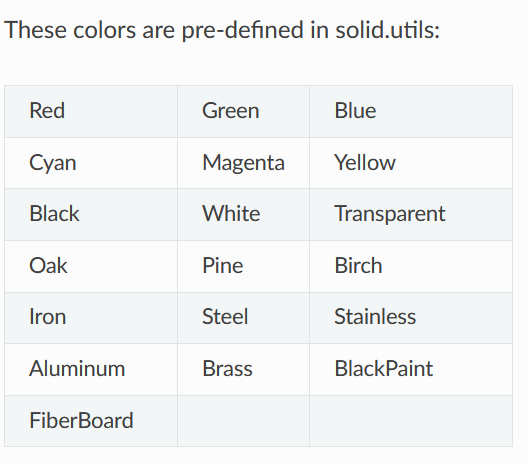

## Imports
* stl import
* import SCAD
    * lego Brick Model

In [72]:
q = import_stl("C://Users//jil26//Documents//GitHub//ME480//JupyterNotebooks//darthVader.stl")
w = translate([100,0,0])(q)
print(scad_render(q+w))#.replace('\n','').replace('\t','')
r.render(q)

IndentationError: unexpected indent (<ipython-input-72-a72853b23aec>, line 2)

Sometimes the renderer isnt perfect, so you have to copy and paste into openscad

# [OpenSCAD MCAD Library](https://github.com/openscad/MCAD)

In [68]:
scadfile = import_scad('C://Users//jil26//Documents//GitHub//MCAD//lego_compatibility.scad')


#print(scadfile)
width = 10
length = 5
height = 2
b = scadfile.block(width,length,height,reinforcement=True)
r.render(b)

In [ ]:
width = 10
length = 5
height = 2
b = scadfile.block(width,length,height)
r.render(b)

In [69]:
x = minkowski()(cylinder(r=5,h=5),sphere(1))
cn =cylinder(r=10,h=5)- hole()(cylinder(r=5,h=5))-translate([0,0,5])(x)
r.render(cn)